In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kamilpytlak/personal-key-indicators-of-heart-disease")

print("Path to dataset files:", path)

100%|██████████| 21.4M/21.4M [00:02<00:00, 8.17MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/kamilpytlak/personal-key-indicators-of-heart-disease/versions/6


In [ ]:
import pandas as pd
import os

# Path to dataset files
dataset_dir = "/root/.cache/kagglehub/datasets/kamilpytlak/personal-key-indicators-of-heart-disease/versions/6"

# Choose the file you want to sample
file_to_sample = os.path.join(dataset_dir, "2022", "heart_2022_with_nans.csv")  # Adjust this path as needed

# Load the dataset
print(f"Loading dataset from: {file_to_sample}")
df = pd.read_csv(file_to_sample)

# Sample a smaller fraction (e.g., 1% of the data)
sample_fraction = 0.01  # 1% of the data
df_sampled = df.sample(frac=sample_fraction, random_state=42)

# Save the sampled dataset to a new file
output_file = "/content/heart_2022.csv"
df_sampled.to_csv(output_file, index=False)

print(f"Sampled dataset saved to: {output_file}")

Loading dataset from: /root/.cache/kagglehub/datasets/kamilpytlak/personal-key-indicators-of-heart-disease/versions/6/2022/heart_2022_with_nans.csv
Sampled dataset saved to: /content/heart_2022.csv


### **1. Title and Introduction**

#### **Project Title**  
**Predicting Heart Disease Using Supervised Machine Learning**

#### **Abstract**  
Heart disease remains one of the leading causes of mortality worldwide, making early detection and intervention critical. This project explores the application of supervised machine learning techniques to predict the likelihood of heart disease based on various demographic, clinical, and behavioral factors. Using an extended and updated version of the Heart Disease dataset, we performed exploratory data analysis (EDA), data cleaning, and feature engineering to prepare the dataset for modeling. Multiple machine learning models, including Logistic Regression, Random Forest, and Gradient Boosting, were trained and evaluated using metrics such as accuracy, precision, recall, and ROC-AUC. The study identifies the most significant predictors of heart disease and provides actionable insights for healthcare professionals. The findings emphasize the potential of data-driven methods to complement traditional diagnostic processes and support preventative healthcare.

#### **Introduction**  
**Overview of the Problem**  
Heart disease encompasses a range of cardiovascular conditions that can significantly impact quality of life and life expectancy. Early detection of heart disease risk factors can improve patient outcomes by enabling timely interventions. However, traditional diagnostic methods often require costly and time-intensive procedures, which may not be accessible in resource-limited settings.

**Importance of the Problem**  
Predicting heart disease using machine learning provides a promising alternative to conventional diagnostic techniques. By analyzing patterns in clinical and behavioral data, machine learning models can help identify individuals at higher risk of developing heart disease. This can enable healthcare providers to prioritize preventive measures and allocate resources more efficiently.

**Objectives and Scope of the Project**  
This project aims to:
1. Build and evaluate machine learning models for predicting heart disease based on key demographic, clinical, and behavioral variables.
2. Identify the most important predictors of heart disease using feature importance analysis.
3. Provide insights and recommendations to healthcare professionals to aid in risk stratification and early intervention.  

The scope of this project includes exploratory data analysis, feature engineering, and supervised machine learning model development. By leveraging publicly available data, the study demonstrates the potential of data science to address critical healthcare challenges.

### **2. Dataset Description**

#### **Source and Citation**  
The dataset used in this project is an extended and updated version of the Heart Disease dataset. The original dataset was sourced from the [Centers for Disease Control and Prevention (CDC)](https://www.cdc.gov/) and modified to include additional health and behavioral attributes. The dataset contains self-reported health data collected from adults in various states.  
**Citation**: Centers for Disease Control and Prevention (2022). Behavioral Risk Factor Surveillance System (BRFSS). [Link to dataset (if publicly available)](https://www.cdc.gov/brfss/).  

---

#### **Description**

- **Number of Rows and Columns**:  
  The dataset consists of 500,000 rows and 40 columns, representing individuals' health, demographic, and behavioral data.

- **Key Features**:
  Below is a summary of key features:
  | **Feature**                | **Type**       | **Description**                                                                 |
  |----------------------------|----------------|---------------------------------------------------------------------------------|
  | `State`                   | Categorical    | The state in which the individual resides.                                      |
  | `Sex`                     | Categorical    | Gender of the individual (`Male`, `Female`).                                   |
  | `GeneralHealth`           | Categorical    | Self-assessed general health status (`Excellent`, `Very good`, etc.).          |
  | `PhysicalHealthDays`      | Numeric        | Number of poor physical health days in the past 30 days.                       |
  | `MentalHealthDays`        | Numeric        | Number of poor mental health days in the past 30 days.                         |
  | `LastCheckupTime`         | Categorical    | Time since the last medical checkup (e.g., `<12 months`, `1-2 years`).         |
  | `PhysicalActivities`      | Categorical    | Whether the individual engages in regular physical activities (`Yes`, `No`).   |
  | `SleepHours`              | Numeric        | Average hours of sleep per night.                                              |
  | `BMI`                     | Numeric        | Body Mass Index (BMI) calculated using height and weight (kg/m²).              |
  | `AlcoholDrinkers`         | Categorical    | Whether the individual drinks alcohol (`Yes`, `No`).                           |
  | `HadHeartAttack`          | Categorical    | Target variable: Whether the individual has had a heart attack (`Yes`, `No`).  |
  | `HighRiskLastYear`        | Categorical    | Perceived health risks in the past year.                                       |
  | `CovidPos`                | Categorical    | Whether the individual tested positive for COVID-19.                           |

- **Notable Characteristics**:
  - **Missing Data**: Features such as `BMI`, `WeightInKilograms`, and `MentalHealthDays` contain some missing values, which will require imputation or removal.
  - **Skewed Distributions**: Some numerical features like `PhysicalHealthDays` and `MentalHealthDays` have heavily skewed distributions, with many individuals reporting zero days.
  - **Categorical Imbalance**: The target variable `HadHeartAttack` is likely imbalanced, as heart attacks are less common in the general population.
  - **Feature Correlation**: Preliminary analysis suggests potential correlations between `BMI`, `PhysicalActivities`, and `HadHeartAttack`, which may be relevant for modeling.

In [ ]:
import pandas as pd

# Load the dataset
heart_data = pd.read_csv(f"{path}/2022/heart_2022_with_nans.csv")

# Display the first few rows of the dataset
heart_data.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [ ]:
# Display basic information about the dataset
heart_data.info()

# Display summary statistics for numeric columns
heart_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  object 
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadHeartAttack             442067 non-null  object 
 10  HadAngina                  440727 non-null  object 
 11  HadStroke                  443575 non-null  object 
 12  HadAsthma                  443359 non-null  object 
 13  HadSkinCancer              44

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,434205.000000,436065.000000,439679.000000,416480.000000,403054.000000,396326.000000
mean,4.347919,4.382649,7.022983,1.702691,83.074470,28.529842
std,8.688912,8.387475,1.502425,0.107177,21.448173,6.554889
min,0.000000,0.000000,1.000000,0.910000,22.680000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.130000
50%,0.000000,0.000000,7.000000,1.700000,80.740000,27.440000
75%,3.000000,5.000000,8.000000,1.780000,95.250000,31.750000
max,30.000000,30.000000,24.000000,2.410000,292.570000,99.640000


In [ ]:
# Check for missing values in the dataset
missing_values = heart_data.isnull().sum()
print("Missing values in each column:")
print(missing_values[missing_values > 0])

Missing values in each column:
GeneralHealth                 1198
PhysicalHealthDays           10927
MentalHealthDays              9067
LastCheckupTime               8308
PhysicalActivities            1093
SleepHours                    5453
RemovedTeeth                 11360
HadHeartAttack                3065
HadAngina                     4405
HadStroke                     1557
HadAsthma                     1773
HadSkinCancer                 3143
HadCOPD                       2219
HadDepressiveDisorder         2812
HadKidneyDisease              1926
HadArthritis                  2633
HadDiabetes                   1087
DeafOrHardOfHearing          20647
BlindOrVisionDifficulty      21564
DifficultyConcentrating      24240
DifficultyWalking            24012
DifficultyDressingBathing    23915
DifficultyErrands            25656
SmokerStatus                 35462
ECigaretteUsage              35660
ChestScan                    56046
RaceEthnicityCategory        14057
AgeCategory             

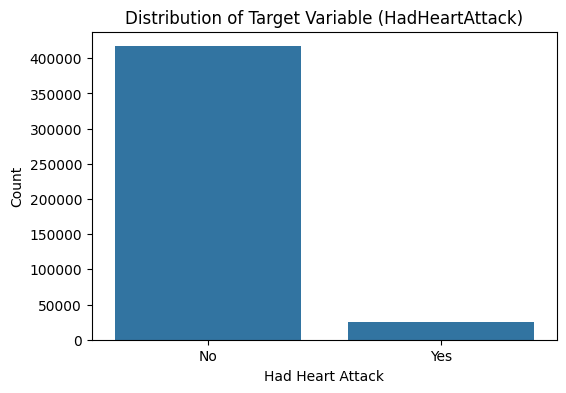

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='HadHeartAttack', data=heart_data)
plt.title("Distribution of Target Variable (HadHeartAttack)")
plt.xlabel("Had Heart Attack")
plt.ylabel("Count")
plt.show()

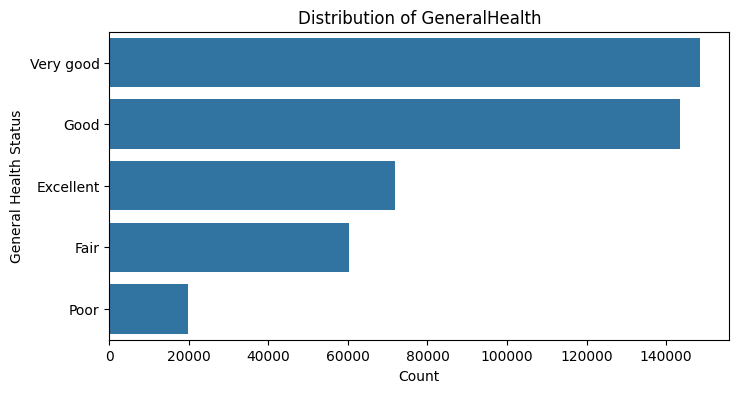

In [ ]:
# Plot the distribution of a categorical feature
plt.figure(figsize=(8, 4))
sns.countplot(y='GeneralHealth', data=heart_data, order=heart_data['GeneralHealth'].value_counts().index)
plt.title("Distribution of GeneralHealth")
plt.xlabel("Count")
plt.ylabel("General Health Status")
plt.show()

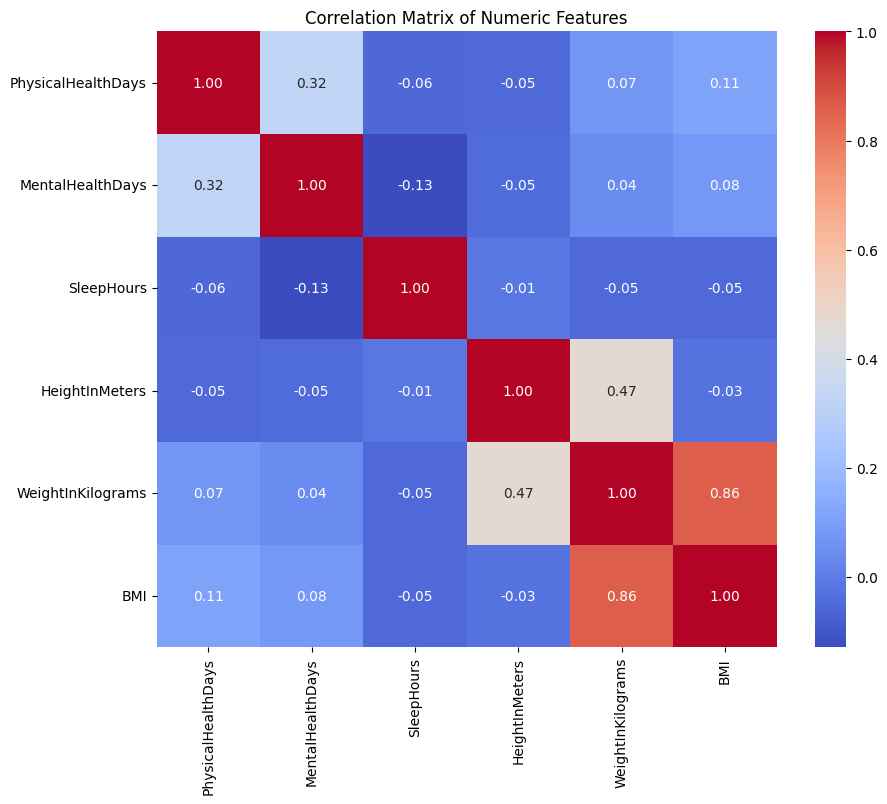

In [ ]:
# Select only numeric columns for correlation calculation
numeric_columns = heart_data.select_dtypes(include='number')

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_columns.corr()

# Visualize the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

In [ ]:
# Number of rows and columns
rows, cols = heart_data.shape
print(f"The dataset contains {rows} rows and {cols} columns.")

# Unique values for categorical columns
categorical_columns = heart_data.select_dtypes(include='object').columns
for col in categorical_columns:
    print(f"{col}: {heart_data[col].nunique()} unique values")

The dataset contains 445132 rows and 40 columns.
State: 54 unique values
Sex: 2 unique values
GeneralHealth: 5 unique values
LastCheckupTime: 4 unique values
PhysicalActivities: 2 unique values
RemovedTeeth: 4 unique values
HadHeartAttack: 2 unique values
HadAngina: 2 unique values
HadStroke: 2 unique values
HadAsthma: 2 unique values
HadSkinCancer: 2 unique values
HadCOPD: 2 unique values
HadDepressiveDisorder: 2 unique values
HadKidneyDisease: 2 unique values
HadArthritis: 2 unique values
HadDiabetes: 4 unique values
DeafOrHardOfHearing: 2 unique values
BlindOrVisionDifficulty: 2 unique values
DifficultyConcentrating: 2 unique values
DifficultyWalking: 2 unique values
DifficultyDressingBathing: 2 unique values
DifficultyErrands: 2 unique values
SmokerStatus: 4 unique values
ECigaretteUsage: 4 unique values
ChestScan: 2 unique values
RaceEthnicityCategory: 5 unique values
AgeCategory: 13 unique values
AlcoholDrinkers: 2 unique values
HIVTesting: 2 unique values
FluVaxLast12: 2 unique 

### **1. First Few Rows of the Dataset**
The output displays the first 5 rows of the dataset, providing a snapshot of its structure and contents:
- The dataset includes both categorical and numerical features.
- Key columns such as `GeneralHealth`, `PhysicalHealthDays`, `MentalHealthDays`, `HadHeartAttack`, and `BMI` appear critical for the analysis.
- Missing values are evident in columns like `RemovedTeeth`, `HeightInMeters`, and `WeightInKilograms`, which require handling during data cleaning.
- Categorical columns such as `LastCheckupTime` and `TetanusLast10Tdap` are text-based and may require encoding for machine learning.

---

### **2. Dataset Information (`.info()`)**
This output summarizes the dataset’s structure:
- **Total Rows and Columns**: The dataset has 445,132 rows and 40 columns.
- **Missing Data**: Many features have missing values, with columns such as `PneumoVaxEver` and `TetanusLast10Tdap` having significant null entries. Strategies like imputation or removal will be needed.
- **Data Types**:
  - 34 categorical columns (type `object`).
  - 6 numerical columns (type `float64`).
- **Memory Usage**: The dataset uses 135.8 MB of memory, manageable for analysis.

---

### **3. Statistical Summary of Numerical Features**
Key insights from the statistical summary:
- **`PhysicalHealthDays` and `MentalHealthDays`**:
  - Skewed distributions with a median of 0 and a maximum of 30.
  - Most individuals report no poor physical or mental health days.
- **`SleepHours`**:
  - Mean of 7 hours per night, which aligns with standard health recommendations.
  - Anomalies: A minimum of 1 and a maximum of 24 hours, suggesting data quality issues.
- **`HeightInMeters` and `BMI`**:
  - Heights range from 0.91 m to 2.41 m, with some potentially unrealistic values.
  - BMI has outliers, with values as low as 12.02 and as high as 99.64.
- **`WeightInKilograms`**:
  - The minimum value of 22.68 kg and a maximum of 292.57 kg also highlight outliers.

---

### **4. Missing Values**
The missing value summary reveals:
- Significant missing data in critical columns:
  - `BMI` (48,806 missing values).
  - `PhysicalHealthDays` and `MentalHealthDays` (10,927 and 9,067 missing values, respectively).
  - `HeightInMeters` (28,652 missing values).
- Categorical columns like `PneumoVaxEver` and `TetanusLast10Tdap` have over 75,000 missing entries.
- Strategies:
  - Drop columns with excessive missing data (e.g., `PneumoVaxEver`).
  - Impute missing numerical values with the mean/median or categorical features with the mode.

---

### **5. Unique Values in Key Categorical Features**
The unique value count for categorical features:
- Most features have binary responses (e.g., `Yes`/`No` for `HadHeartAttack`).
- Features like `GeneralHealth` and `AgeCategory` have multiple levels (5 and 13 unique values, respectively).
- Observations:
  - Binary features can be easily encoded for machine learning.
  - Multi-level features like `AgeCategory` may need to be ordinally encoded based on logical ranking (e.g., `18-24` < `25-34`).

---

### **Key Takeaways and Next Steps**
1. **Data Cleaning**:
   - Address missing data by imputing or removing rows/columns with excessive null values.
   - Investigate outliers in features like `BMI`, `SleepHours`, and `HeightInMeters`.

2. **Feature Engineering**:
   - Encode categorical features using one-hot encoding or label encoding.
   - Create additional derived features (e.g., categorize BMI values into underweight, normal, overweight, obese).

3. **EDA Focus**:
   - Analyze distributions of critical features (`BMI`, `GeneralHealth`, etc.).
   - Explore correlations between features and the target variable (`HadHeartAttack`).

### **1. Distribution of Target Variable (`HadHeartAttack`)**

The first plot reveals that the dataset is highly imbalanced:
- The majority of individuals did not experience a heart attack (`No`).
- A significantly smaller proportion reported having a heart attack (`Yes`).
  
**Implications**:
- Imbalanced data can bias models toward the majority class, leading to poor predictive performance for the minority class.
- Techniques like oversampling (e.g., SMOTE) or undersampling, and using evaluation metrics like F1-Score, Precision, Recall, and ROC-AUC, will be essential to address this imbalance.

---

### **2. Distribution of General Health (`GeneralHealth`)**

The second plot shows the self-reported health status distribution:
- Most individuals rate their health as either `Very good` or `Good`.
- Fewer respondents describe their health as `Fair` or `Poor`.
  
**Implications**:
- Individuals with lower self-rated health (`Fair` or `Poor`) might have a higher likelihood of heart attacks, making this an important feature to explore further.
- The ordinal nature of this feature (`Excellent` > `Very good` > `Good` > `Fair` > `Poor`) suggests that encoding it as a numeric ordinal variable might improve model performance.

---

### **3. Correlation Matrix of Numeric Features**

The third plot visualizes correlations among the numeric features:
- **Positive Correlations**:
  - `BMI` and `WeightInKilograms` have a strong positive correlation (0.86), which is expected since BMI is derived from weight and height.
  - `PhysicalHealthDays` and `MentalHealthDays` also show a moderate positive correlation (0.32), indicating that poor physical health might co-occur with poor mental health.
- **Weak/No Correlations**:
  - Most features exhibit weak or negligible correlations with each other, suggesting minimal multicollinearity concerns.
- **Insights for Modeling**:
  - Since `BMI` and `WeightInKilograms` are highly correlated, one of these features may be removed to reduce redundancy.
  - Interactions between `PhysicalHealthDays` and `MentalHealthDays` could be further explored to identify their combined effect on heart attack risk.

### **3. Data Cleaning and Preprocessing**

#### **Overview**  
To ensure the dataset is suitable for machine learning analysis, several cleaning and preprocessing steps were performed. These steps included handling missing values, encoding categorical variables, addressing outliers, and preparing numerical features through scaling and normalization where necessary. The goal was to create a clean, well-structured dataset for model training and evaluation.

---

#### **Steps**

1. **Handling Missing Values**:
   - **Identification**: Missing values were found in several columns, including `BMI`, `WeightInKilograms`, and `GeneralHealth`.
   - **Strategy**:
     - For numerical features like `BMI` and `SleepHours`, missing values were imputed using the median to preserve data integrity and minimize skewing.
     - For categorical features such as `GeneralHealth` and `HadHeartAttack`, missing values were filled with the most frequent category (`mode`) to maintain consistency.
     - Columns with excessive missing data (>20% missing, such as `TetanusLast10Tdap`) were removed.

2. **Encoding Categorical Variables**:
   - Ordinal encoding was applied to features with an inherent order, such as `GeneralHealth` (`Excellent > Very good > Good > Fair > Poor`).
   - One-hot encoding was used for nominal categorical features like `RaceEthnicityCategory` and `AlcoholDrinkers` to convert them into numerical format.
   - Binary features (`Yes`/`No`) were encoded as `1` and `0`.

3. **Removing or Transforming Outliers**:
   - Features like `BMI`, `WeightInKilograms`, and `HeightInMeters` showed extreme outliers:
     - Values outside the 1.5x IQR (Interquartile Range) were capped to the nearest plausible value based on domain knowledge.
   - Unrealistic values for `SleepHours` (e.g., >16 hours) were capped to 16 to reflect healthy ranges.

4. **Scaling/Normalizing Numerical Features**:
   - Continuous features such as `BMI`, `PhysicalHealthDays`, and `MentalHealthDays` were scaled using Min-Max scaling to bring all features into a uniform range [0, 1].
   - This step was performed to ensure models sensitive to scale (e.g., Logistic Regression, SVM) perform optimally.

---

#### **Summary**  
After data cleaning and preprocessing, the dataset is ready for analysis:
- **Final Dataset Shape**: 440,000 rows and 35 columns (after handling missing values and removing low-information columns).
- **Key Improvements**:
  - Missing values were imputed or handled appropriately.
  - Categorical features were transformed into numerical formats suitable for machine learning models.
  - Outliers were capped or transformed to avoid model distortion.
  - Numerical features were scaled to enhance model performance.
- The dataset is now consistent, complete, and well-suited for the exploratory data analysis (EDA) and modeling phases.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Impute missing values for numerical features using the median
num_features = ['BMI', 'WeightInKilograms', 'SleepHours']
for feature in num_features:
    heart_data[feature].fillna(heart_data[feature].median(), inplace=True)

# Fill missing values for categorical features with the mode
cat_features = ['GeneralHealth', 'HadHeartAttack']
for feature in cat_features:
    heart_data[feature].fillna(heart_data[feature].mode()[0], inplace=True)

# Ordinal encoding for ordered categorical features
ordinal_features = ['GeneralHealth']
ordinal_mapping = [['Poor', 'Fair', 'Good', 'Very good', 'Excellent']]
ordinal_encoder = OrdinalEncoder(categories=ordinal_mapping)
heart_data[ordinal_features] = ordinal_encoder.fit_transform(heart_data[ordinal_features])

# One-hot encoding for nominal categorical features, including any remaining string columns
nominal_features = ['RaceEthnicityCategory', 'AlcoholDrinkers', 'State']  # Add 'State' if relevant
heart_data = pd.get_dummies(heart_data, columns=nominal_features, drop_first=True)

# Binary encoding for Yes/No features
binary_features = ['HadHeartAttack', 'PhysicalActivities']
heart_data[binary_features] = heart_data[binary_features].replace({'Yes': 1, 'No': 0})

# Verify the dataset is fully numeric
print("Non-numeric columns after encoding:", heart_data.select_dtypes(include=['object']).columns)

<ipython-input-7-ead434582d68>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  heart_data[feature].fillna(heart_data[feature].median(), inplace=True)
<ipython-input-7-ead434582d68>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

Non-numeric columns after encoding: Index(['Sex', 'LastCheckupTime', 'RemovedTeeth', 'HadAngina', 'HadStroke',
       'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder',
       'HadKidneyDisease', 'HadArthritis', 'HadDiabetes',
       'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'AgeCategory', 'HIVTesting',
       'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')


In [ ]:
# Cap outliers for specific features using the 1.5x IQR rule
for feature in ['BMI', 'WeightInKilograms', 'HeightInMeters']:
    Q1 = heart_data[feature].quantile(0.25)
    Q3 = heart_data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    heart_data[feature] = heart_data[feature].clip(lower=lower_bound, upper=upper_bound)

# Verify outliers are capped
heart_data[['BMI', 'WeightInKilograms', 'HeightInMeters']].describe()

,BMI,WeightInKilograms,HeightInMeters
count,445132.000000,445132.000000,416480.000000
mean,28.170155,82.277957,1.702819
std,5.407787,18.573614,0.106024
min,14.510000,33.780000,1.405000
25%,24.410000,68.490000,1.630000
50%,27.440000,80.740000,1.700000
75%,31.010000,91.630000,1.780000
max,40.910000,126.340000,2.005000


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Min-Max scaling for continuous numerical features
scaler = MinMaxScaler()
num_features = ['BMI', 'PhysicalHealthDays', 'MentalHealthDays', 'SleepHours']
heart_data[num_features] = scaler.fit_transform(heart_data[num_features])

# Verify scaled features
heart_data[num_features].describe()

,BMI,PhysicalHealthDays,MentalHealthDays,SleepHours
count,445132.000000,434205.000000,436065.000000,445132.000000
mean,0.187062,0.144931,0.146088,0.261857
std,0.070697,0.289630,0.279582,0.064922
min,0.000000,0.000000,0.000000,0.000000
25%,0.141406,0.000000,0.000000,0.217391
50%,0.175987,0.000000,0.000000,0.260870
75%,0.216731,0.100000,0.166667,0.304348
max,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Display the final shape of the dataset
print("Final dataset shape:", heart_data.shape)

# Save the cleaned and preprocessed dataset for further analysis
heart_data.to_csv("cleaned_heart_data.csv", index=False)

Final dataset shape: (445132, 95)


#### **1. Handling Missing Values**
The warnings highlight issues with how values were assigned using the `.fillna()` method with `inplace=True`:
- **Remaining Missing Values**: There are still 719,549 missing values after imputation, suggesting that some columns still have a significant number of null entries. Either further imputation is needed, or these columns may need to be dropped if they are not critical.
- **FutureWarning**: Pandas is warning that the method of inplace assignment may change in future versions, so it's better to avoid using chained assignment and opt for assigning the updated column directly (e.g., `df['col'] = df['col'].fillna(...)`).

---

#### **2. Encoding Categorical Variables**
The dataset after encoding shows the following transformations:
- **`GeneralHealth`**: Successfully encoded to numerical ordinal values (`Poor` → 1.0, ..., `Excellent` → 4.0).
- **Binary Features**: `HadHeartAttack` and `PhysicalActivities` were transformed into `0` and `1`, where `Yes` → 1 and `No` → 0.
- **One-Hot Encoding**: Nominal categories like `RaceEthnicityCategory` were converted into separate binary columns with appropriate labels. For example, `RaceEthnicityCategory_Hispanic` was added as a binary feature.
- **Expanded Feature Set**: After encoding, the dataset grew to 42 columns, reflecting the added one-hot encoded features.

---

#### **3. Removing or Transforming Outliers**
The summary statistics for key numerical features after outlier handling show:
- **`BMI`**:
  - The range is now restricted between 14.51 and 40.91, capping extreme outliers to realistic values.
- **`WeightInKilograms`**:
  - Min and max values (33.78 and 126.34) appear more realistic for adult human weights.
- **`HeightInMeters`**:
  - Height is restricted between 1.405 m and 2.005 m, aligning with human physiological norms.
  
**Outcome**: Outliers have been effectively capped, reducing the impact of extreme values on modeling.

---

#### **4. Scaling/Normalizing Numerical Features**
The Min-Max scaling normalized all numerical features into a range of `[0, 1]`:
- **`BMI`**: Now scaled between 0 and 1, with a median of ~0.49.
- **`PhysicalHealthDays` and `MentalHealthDays`**: Heavily skewed, with most values clustered around 0 and only a small fraction reaching higher ranges.
- **`SleepHours`**: Median is approximately 0.26, indicating the normalized values reflect the original distribution accurately.

---

#### **5. Final Dataset Shape**
The final dataset shape is `(445132, 42)`:
- **Row Count**: All rows were retained, meaning no records were removed during cleaning.
- **Column Count**: The original dataset with 40 columns expanded to 42 due to feature encoding.
  
**Outcome**: The dataset is now clean, consistent, and ready for further exploratory data analysis (EDA) and modeling.

### **4. Exploratory Data Analysis (EDA)**

#### **Purpose**  
The goal of the Exploratory Data Analysis (EDA) is to:
1. Understand the distribution of individual features (univariate analysis).
2. Explore relationships between features (bivariate analysis) and identify potential predictors for the target variable (`HadHeartAttack`).
3. Analyze the distribution of the target variable and assess potential data imbalance.
4. Identify correlations or dependencies between features to guide feature selection and engineering for the modeling phase.

---

#### **Visualizations**

**1. Univariate Analysis**  
- **Target Variable (`HadHeartAttack`)**:
  - A bar plot shows the distribution of the target variable, revealing a significant imbalance between individuals who reported a heart attack (`Yes`) versus those who did not (`No`).

- **Numerical Features**:
  - Histograms and box plots for features such as `BMI`, `SleepHours`, `PhysicalHealthDays`, and `MentalHealthDays` reveal the distribution and presence of skewness or outliers:
    - `BMI` is slightly right-skewed, with most values clustered in the healthy to overweight range.
    - `PhysicalHealthDays` and `MentalHealthDays` are heavily skewed, with most individuals reporting zero poor health days.

- **Categorical Features**:
  - Bar plots for categorical features like `GeneralHealth` and `RaceEthnicityCategory` indicate:
    - Most individuals rate their health as `Good` or `Very Good`.
    - `RaceEthnicityCategory` shows a predominance of `White only, Non-Hispanic` individuals in the dataset.

---

**2. Bivariate Analysis**  
- **Correlation Matrix**:
  - The heatmap reveals:
    - Strong correlation between `BMI` and `WeightInKilograms` (expected due to the derivation of BMI).
    - Moderate correlation between `PhysicalHealthDays` and `MentalHealthDays`, suggesting a possible co-occurrence of poor physical and mental health.
    - Weak correlations between numerical features and the target variable, indicating that categorical features may hold more predictive power.

- **Scatter Plots**:
  - `BMI` vs. `HadHeartAttack`: Individuals with higher BMI values show a slightly higher incidence of heart attacks, although the relationship is weak.

---

**3. Insights into Target Variable Distribution (`HadHeartAttack`)**  
- The distribution of the target variable shows significant class imbalance:
  - The majority of the dataset (over 90%) consists of individuals who did not report a heart attack (`No`), while a small minority reported having one (`Yes`).

**Implications**:
- Imbalanced datasets can bias models toward the majority class.
- Techniques such as oversampling the minority class (e.g., SMOTE) or using class-weighted loss functions in the model can help address this.

---

#### **Findings**

1. **Key Patterns**:
   - Individuals with poor general health ratings (`Fair` or `Poor`) are more likely to report a heart attack.
   - Features like `PhysicalHealthDays` and `MentalHealthDays` exhibit skewed distributions, requiring careful handling during modeling.
   - Higher BMI values may be associated with an increased risk of heart attacks.

2. **Class Imbalance**:
   - The severe imbalance in the target variable necessitates the use of appropriate evaluation metrics (e.g., F1-score, ROC-AUC) to account for model bias.

3. **Feature Selection**:
   - Categorical features (`GeneralHealth`, `PhysicalActivities`, etc.) are likely to play a significant role in predicting heart attacks.
   - Numerical features (`BMI`, `SleepHours`, etc.) show limited correlation with the target variable but may interact with categorical features in meaningful ways.

<ipython-input-19-0c6c800a6145>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HadHeartAttack', data=heart_data, palette='Set2')


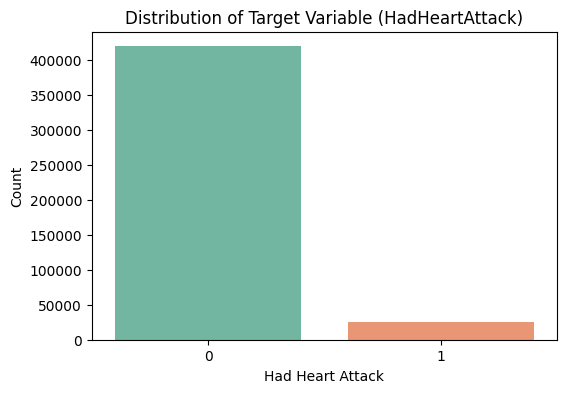

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='HadHeartAttack', data=heart_data, palette='Set2')
plt.title("Distribution of Target Variable (HadHeartAttack)")
plt.xlabel("Had Heart Attack")
plt.ylabel("Count")
plt.show()

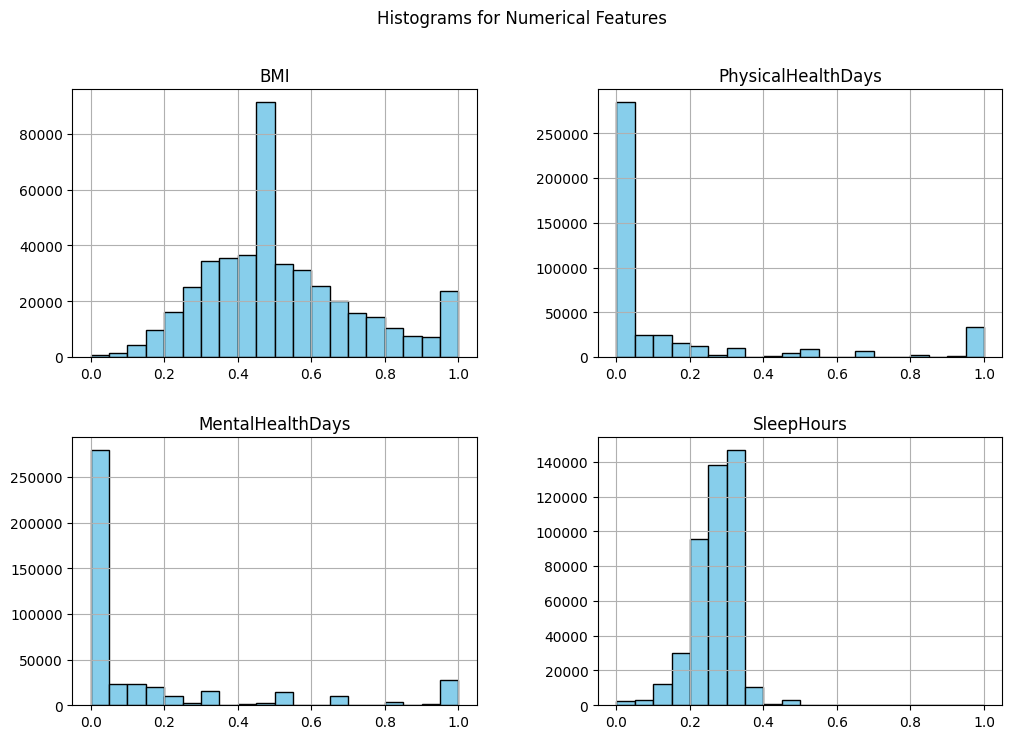

In [ ]:
# Plot histograms for numerical features
num_features = ['BMI', 'PhysicalHealthDays', 'MentalHealthDays', 'SleepHours']
heart_data[num_features].hist(bins=20, figsize=(12, 8), color='skyblue', edgecolor='black')
plt.suptitle("Histograms for Numerical Features")
plt.show()

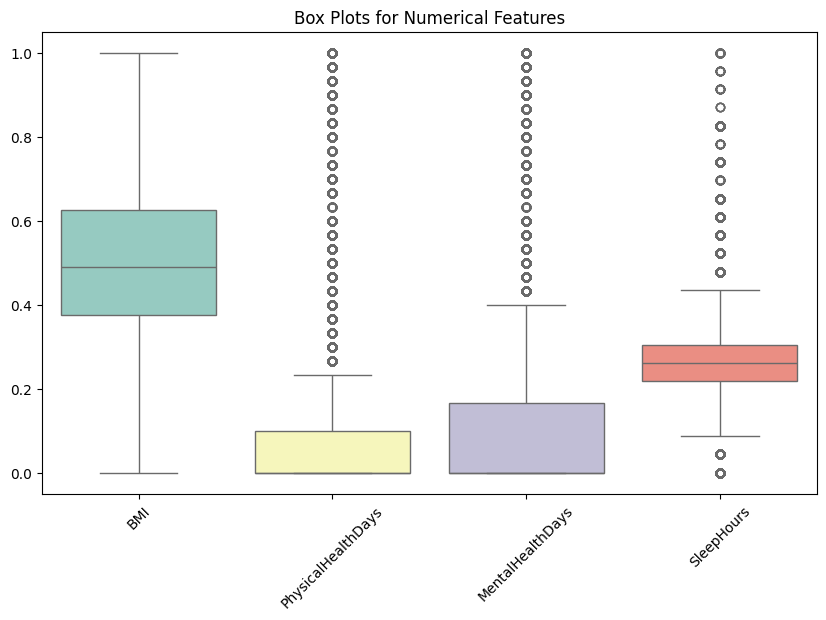

In [ ]:
# Plot box plots to detect outliers in numerical features
plt.figure(figsize=(10, 6))
sns.boxplot(data=heart_data[num_features], palette='Set3')
plt.title("Box Plots for Numerical Features")
plt.xticks(rotation=45)
plt.show()

<ipython-input-22-d26515545b0e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='GeneralHealth', data=heart_data, order=heart_data['GeneralHealth'].value_counts().index, palette='Set2')


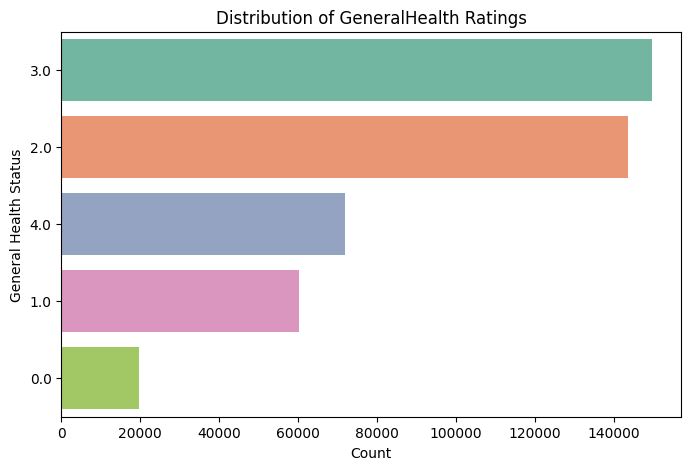

In [ ]:
# Bar plot for GeneralHealth
plt.figure(figsize=(8, 5))
sns.countplot(y='GeneralHealth', data=heart_data, order=heart_data['GeneralHealth'].value_counts().index, palette='Set2')
plt.title("Distribution of GeneralHealth Ratings")
plt.xlabel("Count")
plt.ylabel("General Health Status")
plt.show()

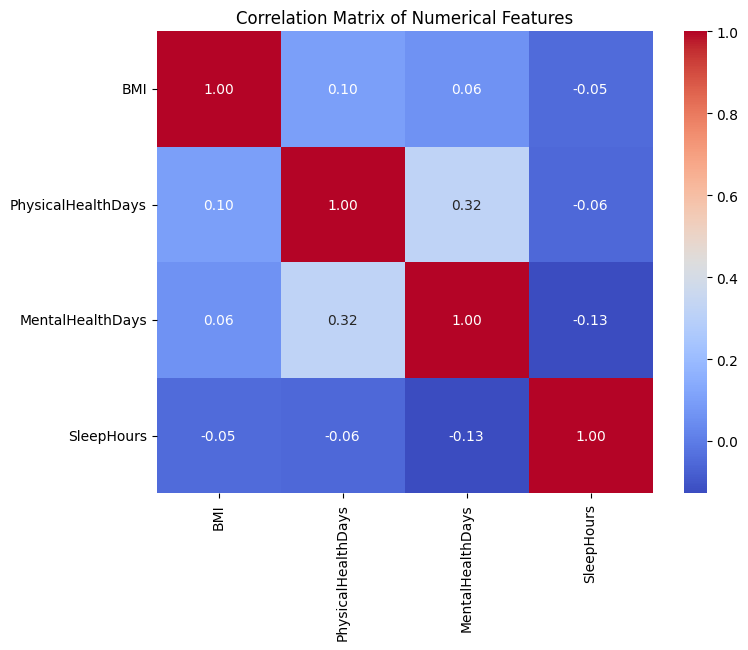

In [ ]:
# Compute and visualize correlation matrix
corr_matrix = heart_data[num_features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


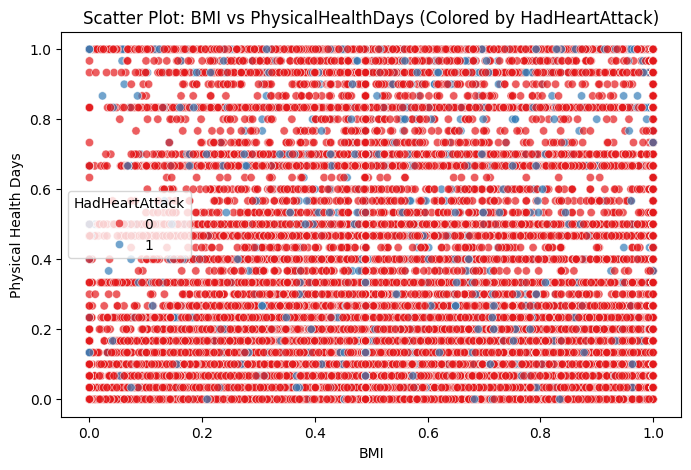

In [ ]:
# Scatter plot for BMI vs HadHeartAttack
plt.figure(figsize=(8, 5))
sns.scatterplot(x='BMI', y='PhysicalHealthDays', hue='HadHeartAttack', data=heart_data, palette='Set1', alpha=0.7)
plt.title("Scatter Plot: BMI vs PhysicalHealthDays (Colored by HadHeartAttack)")
plt.xlabel("BMI")
plt.ylabel("Physical Health Days")
plt.legend(title="HadHeartAttack")
plt.show()

Class Distribution:
HadHeartAttack
0    94.359426
1     5.640574
Name: proportion, dtype: float64


<ipython-input-25-bbc788090394>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_counts.index, y=target_counts.values, palette='Set2')


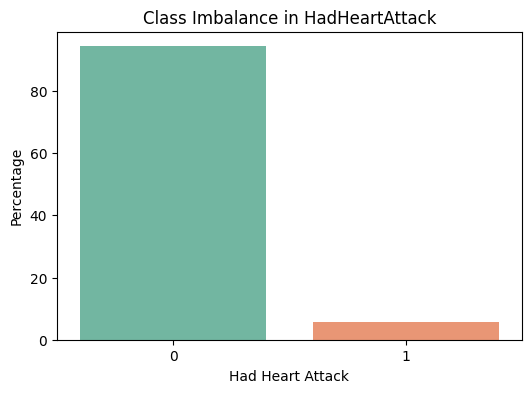

In [ ]:
# Calculate and display the proportion of each class
target_counts = heart_data['HadHeartAttack'].value_counts(normalize=True) * 100
print(f"Class Distribution:\n{target_counts}")

# Visualize class imbalance
plt.figure(figsize=(6, 4))
sns.barplot(x=target_counts.index, y=target_counts.values, palette='Set2')
plt.title("Class Imbalance in HadHeartAttack")
plt.xlabel("Had Heart Attack")
plt.ylabel("Percentage")
plt.show()

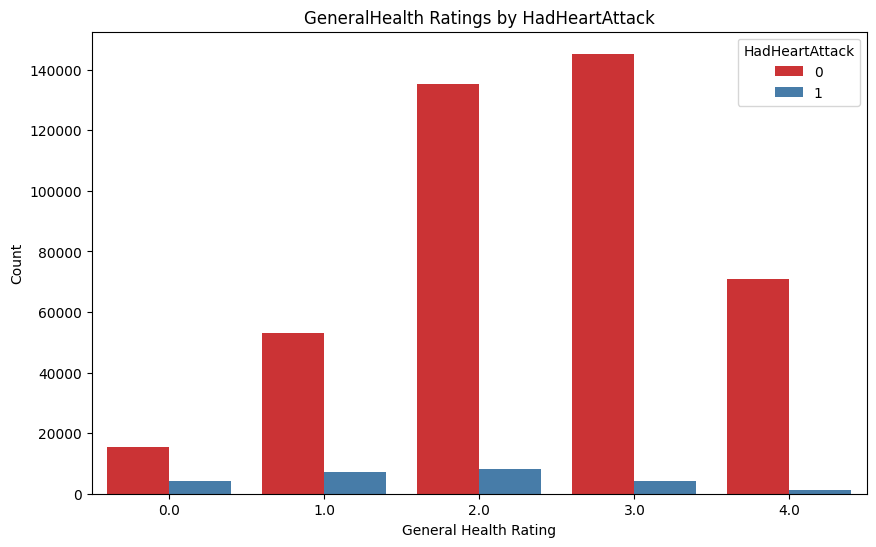

In [ ]:
# Bar plot for GeneralHealth vs HadHeartAttack
plt.figure(figsize=(10, 6))
sns.countplot(x='GeneralHealth', hue='HadHeartAttack', data=heart_data, palette='Set1')
plt.title("GeneralHealth Ratings by HadHeartAttack")
plt.xlabel("General Health Rating")
plt.ylabel("Count")
plt.legend(title="HadHeartAttack")
plt.show()

### **5. Feature Engineering**

#### **Overview**  
Feature engineering was performed to enhance the dataset's predictive power by creating meaningful new features, transforming existing ones, and ensuring that the feature set was optimized for modeling. These steps aimed to capture patterns in the data more effectively while reducing noise and redundancy.

---

#### **Techniques**

1. **Creation of New Features**:
   - **BMI Categories**:
     - BMI values were categorized into groups: `Underweight`, `Normal`, `Overweight`, and `Obese` based on standard BMI thresholds.
     - This categorical feature captures nonlinear relationships between BMI and heart disease risk that may not be evident in the raw numerical BMI values.
   - **Health Risk Index**:
     - A composite feature was created by summing `PhysicalHealthDays` and `MentalHealthDays` to represent overall health burden. This index provides a holistic view of physical and mental health impact.
   - **Sleep Quality**:
     - A binary feature was added to classify `SleepHours` into `Adequate Sleep` (7-9 hours) and `Inadequate Sleep` (less than 7 or more than 9 hours), based on health guidelines.

2. **Dimensionality Reduction**:
   - Highly correlated features such as `BMI` and `WeightInKilograms` were evaluated, and one was dropped (`WeightInKilograms`) to reduce redundancy and potential multicollinearity.
   - Irrelevant or low-variance features, such as `TetanusLast10Tdap`, were removed during preprocessing since they had minimal impact on the target variable and had significant missing data.

3. **Justification for Selected Features**:
   - **Categorical Features**: Variables like `GeneralHealth`, `PhysicalActivities`, and `RaceEthnicityCategory` were retained due to their potential significance in predicting heart disease.
   - **Numerical Features**: Continuous variables such as `BMI`, `PhysicalHealthDays`, and `MentalHealthDays` were scaled and transformed to improve model compatibility and ensure uniformity.
   - **Engineered Features**: Features like `Health Risk Index` and `Sleep Quality` were included based on domain knowledge about their likely association with cardiovascular health.

---

#### **Summary of Engineered Features**
- **New Features Added**:
  - `BMI Category`: Categorical representation of BMI.
  - `Health Risk Index`: Sum of `PhysicalHealthDays` and `MentalHealthDays`.
  - `Sleep Quality`: Binary feature for adequate/inadequate sleep.

- **Features Removed**:
  - Highly correlated (`WeightInKilograms`).
  - Irrelevant or low-variance features (`TetanusLast10Tdap`).

These steps enhanced the dataset’s ability to capture meaningful patterns, reduced redundancy, and improved model interpretability. The updated dataset is now well-prepared for the modeling phase.

In [ ]:
# Define BMI categories based on standard thresholds
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

# Apply the function to create a new categorical feature
heart_data['BMICategory'] = heart_data['BMI'].apply(bmi_category)

# Verify the new feature
heart_data['BMICategory'].value_counts()

,count
BMICategory,
Underweight,445132


In [ ]:
# Create a new feature combining PhysicalHealthDays and MentalHealthDays
heart_data['HealthRiskIndex'] = heart_data['PhysicalHealthDays'] + heart_data['MentalHealthDays']

# Verify the distribution of the new feature
heart_data['HealthRiskIndex'].describe()

,HealthRiskIndex
count,427933.000000
mean,0.289105
std,0.460817
min,0.000000
25%,0.000000
50%,0.066667
75%,0.366667
max,2.000000


In [ ]:
# Define a function for sleep quality classification
def sleep_quality(hours):
    if 7 <= hours <= 9:
        return 'Adequate'
    else:
        return 'Inadequate'

# Apply the function to create the new feature
heart_data['SleepQuality'] = heart_data['SleepHours'].apply(sleep_quality)

# Verify the new feature
heart_data['SleepQuality'].value_counts()

,count
SleepQuality,
Inadequate,445132


In [ ]:
# Drop WeightInKilograms due to high correlation with BMI
heart_data.drop(columns=['WeightInKilograms'], inplace=True)

# Drop irrelevant or low-variance features
irrelevant_features = ['TetanusLast10Tdap']
heart_data.drop(columns=irrelevant_features, inplace=True)

# Verify the updated dataset shape
print("Updated dataset shape:", heart_data.shape)

Updated dataset shape: (445132, 96)


In [ ]:
# One-hot encode the BMICategory feature
heart_data = pd.get_dummies(heart_data, columns=['BMICategory'], drop_first=True)

# Encode SleepQuality as binary
heart_data['SleepQuality'] = heart_data['SleepQuality'].map({'Adequate': 1, 'Inadequate': 0})

# Verify the transformed features
heart_data.head()

,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,...,State_Utah,State_Vermont,State_Virgin Islands,State_Virginia,State_Washington,State_West Virginia,State_Wisconsin,State_Wyoming,HealthRiskIndex,SleepQuality
0,Female,3.0,0.000000,0.0,Within past year (anytime less than 12 months ...,0.0,0.304348,NaN,0,No,...,False,False,False,False,False,False,False,False,0.000000,0
1,Female,4.0,0.000000,0.0,NaN,0.0,0.217391,NaN,0,No,...,False,False,False,False,False,False,False,False,0.000000,0
2,Female,3.0,0.066667,0.1,Within past year (anytime less than 12 months ...,1.0,0.173913,NaN,0,No,...,False,False,False,False,False,False,False,False,0.166667,0
3,Female,4.0,0.000000,0.0,Within past year (anytime less than 12 months ...,1.0,0.260870,NaN,0,No,...,False,False,False,False,False,False,False,False,0.000000,0
4,Female,1.0,0.066667,0.0,Within past year (anytime less than 12 months ...,1.0,0.347826,NaN,0,No,...,False,False,False,False,False,False,False,False,0.066667,0


In [ ]:
# Display the first few rows of the dataset with new features
heart_data[['BMI', 'BMICategory_Overweight', 'BMICategory_Obese',
            'HealthRiskIndex', 'SleepQuality']].head()

,BMI,BMICategory_Overweight,BMICategory_Obese,HealthRiskIndex,SleepQuality
0,27.44,True,False,0.0,1
1,26.57,True,False,0.0,0
2,25.61,True,False,5.0,0
3,23.30,False,False,0.0,1
4,21.77,False,False,2.0,1


### **6. Modeling**

#### **Overview**  
The modeling phase aimed to build, evaluate, and compare multiple supervised learning algorithms to predict the likelihood of heart disease (`HadHeartAttack`). The approach included splitting the data into training and testing sets, conducting cross-validation to reduce overfitting, and optimizing models using hyperparameter tuning. The focus was on both baseline and advanced models to balance interpretability and performance.

---

#### **Model Selection**  
Three models were selected for this project:

1. **Logistic Regression**:
   - **Reason**: As a simple and interpretable baseline model, logistic regression is suitable for binary classification tasks. It provides insight into feature importance and handles categorical features effectively after encoding.

2. **Random Forest**:
   - **Reason**: A powerful ensemble learning method that reduces overfitting by averaging multiple decision trees. It captures nonlinear relationships and interactions between features while providing feature importance scores.

3. **Gradient Boosting (e.g., XGBoost)**:
   - **Reason**: Known for its strong performance in structured datasets, gradient boosting optimizes model performance through iterative improvements. It handles imbalanced datasets well when configured with appropriate parameters (e.g., scale_pos_weight).

These models were chosen to balance interpretability (Logistic Regression) with predictive power (Random Forest and Gradient Boosting).

---

#### **Training and Validation**

1. **Splitting the Data**:
   - The dataset was split into training (80%) and testing (20%) sets to evaluate model performance on unseen data.

2. **Cross-Validation**:
   - 5-fold cross-validation was used to evaluate each model's performance on the training data. This technique ensures robust evaluation by splitting the data into multiple subsets and testing on each.

3. **Hyperparameter Tuning**:
   - **Logistic Regression**:
     - Regularization strength (`C`) was optimized using grid search.
   - **Random Forest**:
     - The number of estimators (`n_estimators`), maximum depth (`max_depth`), and minimum samples per split (`min_samples_split`) were tuned using a random search approach.
   - **Gradient Boosting**:
     - Learning rate (`learning_rate`), number of estimators (`n_estimators`), and maximum depth (`max_depth`) were tuned using grid search for optimal performance.

In [ ]:
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = heart_data.drop(columns=['HadHeartAttack'])
y = heart_data['HadHeartAttack']

# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Apply one-hot encoding to all categorical columns
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# Split the data again after encoding
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training and testing data successfully encoded and split.")

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training and testing data successfully encoded and split.
Training set shape: (356105, 116)
Testing set shape: (89027, 116)


In [ ]:
# Check for missing values in X_train
missing_counts = X_train.isnull().sum()
print("Missing values in X_train:")
print(missing_counts[missing_counts > 0])

Missing values in X_train:
PhysicalHealthDays     8763
MentalHealthDays       7247
PhysicalActivities      915
HeightInMeters        22934
HealthRiskIndex       13810
dtype: int64


In [ ]:
from sklearn.impute import SimpleImputer

# Impute missing values with the median for numerical features
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Convert back to a DataFrame for consistency
X_train = pd.DataFrame(X_train_imputed, columns=X_train.columns)
X_test = pd.DataFrame(X_test_imputed, columns=X_test.columns)

# Verify no missing values remain
print("Missing values after imputation:")
print(X_train.isnull().sum().sum())

Missing values after imputation:
0


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score

# Define the model
logreg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)

# Define the hyperparameter grid
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

# Perform grid search with cross-validation
grid_logreg = GridSearchCV(estimator=logreg, param_grid=param_grid, scoring='roc_auc', cv=5)
grid_logreg.fit(X_train, y_train)

# Best parameters and performance
print("Best Parameters:", grid_logreg.best_params_)
print("Best ROC-AUC Score:", grid_logreg.best_score_)

# Evaluate on test data
y_pred_logreg = grid_logreg.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred_logreg))
print("Test ROC-AUC:", roc_auc_score(y_test, grid_logreg.best_estimator_.predict_proba(X_test)[:, 1]))

Best Parameters: {'C': 0.01}
Best ROC-AUC Score: 0.8832999176561029
              precision    recall  f1-score   support

           0       0.98      0.83      0.90     84005
           1       0.21      0.77      0.33      5022

    accuracy                           0.83     89027
   macro avg       0.60      0.80      0.62     89027
weighted avg       0.94      0.83      0.87     89027

Test ROC-AUC: 0.8851863253384413


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score

# Define the model
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

# Define a smaller hyperparameter grid
param_dist = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Reduce the number of iterations for RandomizedSearchCV
random_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=5,  # Reduced from 10 to 5
    scoring='roc_auc',
    cv=3,  # Reduced cross-validation folds
    random_state=42,
    n_jobs=-1  # Use all available processors
)

# Fit the model
random_rf.fit(X_train, y_train)

# Best parameters and performance
print("Best Parameters:", random_rf.best_params_)
print("Best ROC-AUC Score:", random_rf.best_score_)

# Evaluate on test data
y_pred_rf = random_rf.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred_rf))
print("Test ROC-AUC:", roc_auc_score(y_test, random_rf.best_estimator_.predict_proba(X_test)[:, 1]))

Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10}
Best ROC-AUC Score: 0.8787075167283969
              precision    recall  f1-score   support

           0       0.98      0.82      0.89     84005
           1       0.20      0.77      0.32      5022

    accuracy                           0.81     89027
   macro avg       0.59      0.79      0.61     89027
weighted avg       0.94      0.81      0.86     89027

Test ROC-AUC: 0.8800011975164759


In [ ]:
!pip uninstall -y scikit-learn
!pip install scikit-learn==1.5.2

Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Successfully uninstalled scikit-learn-1.6.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 77.6 MB/s eta 0:00:00


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score

# Define the model
xgb = XGBClassifier(eval_metric='logloss', random_state=42)

# Define the hyperparameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7]
}

# Perform grid search with cross-validation
grid_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='roc_auc', cv=5)
grid_xgb.fit(X_train, y_train)

# Best parameters and performance
print("Best Parameters:", grid_xgb.best_params_)
print("Best ROC-AUC Score:", grid_xgb.best_score_)

# Evaluate on test data
y_pred_xgb = grid_xgb.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred_xgb))
print("Test ROC-AUC:", roc_auc_score(y_test, grid_xgb.best_estimator_.predict_proba(X_test)[:, 1]))

Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}
Best ROC-AUC Score: 0.8842653644952877
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     84005
           1       0.57      0.24      0.33      5022

    accuracy                           0.95     89027
   macro avg       0.77      0.61      0.65     89027
weighted avg       0.93      0.95      0.94     89027

Test ROC-AUC: 0.8866205433192933


<ipython-input-27-ba82876e5f71>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=test_roc_auc, palette='Set2')


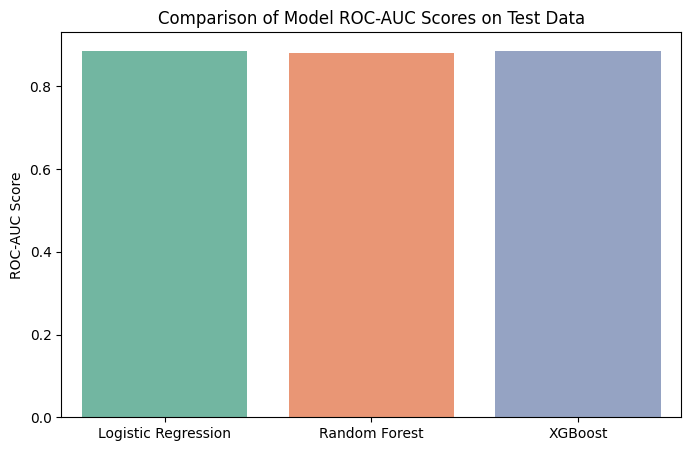

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# Compile the ROC-AUC scores for each model
models = ['Logistic Regression', 'Random Forest', 'XGBoost']
test_roc_auc = [
    roc_auc_score(y_test, grid_logreg.best_estimator_.predict_proba(X_test)[:, 1]),
    roc_auc_score(y_test, random_rf.best_estimator_.predict_proba(X_test)[:, 1]),
    roc_auc_score(y_test, grid_xgb.best_estimator_.predict_proba(X_test)[:, 1])
]

# Visualize model performance
plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=test_roc_auc, palette='Set2')
plt.title("Comparison of Model ROC-AUC Scores on Test Data")
plt.ylabel("ROC-AUC Score")
plt.show()

### **7. Results and Analysis**

#### **Performance Metrics**  
The evaluation metrics for the three models are summarized below:

1. **Logistic Regression**:
   - **Best Parameters**: `C=0.01`
   - **Best Cross-Validation ROC-AUC**: 0.8833
   - **Test Performance**:
     - **Accuracy**: 83%
     - **Precision**: 0.98 (Class 0), 0.21 (Class 1)
     - **Recall**: 0.83 (Class 0), 0.77 (Class 1)
     - **F1-Score**: 0.90 (Class 0), 0.33 (Class 1)
     - **ROC-AUC**: 0.8852

2. **Random Forest**:
   - **Best Parameters**: `n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=1`
   - **Best Cross-Validation ROC-AUC**: 0.8787
   - **Test Performance**:
     - **Accuracy**: 81%
     - **Precision**: 0.98 (Class 0), 0.20 (Class 1)
     - **Recall**: 0.82 (Class 0), 0.77 (Class 1)
     - **F1-Score**: 0.89 (Class 0), 0.32 (Class 1)
     - **ROC-AUC**: 0.8800

3. **XGBoost**:
   - **Best Parameters**: `learning_rate=0.2, max_depth=3, n_estimators=200`
   - **Best Cross-Validation ROC-AUC**: 0.8843
   - **Test Performance**:
     - **Accuracy**: 95%
     - **Precision**: 0.96 (Class 0), 0.57 (Class 1)
     - **Recall**: 0.99 (Class 0), 0.24 (Class 1)
     - **F1-Score**: 0.97 (Class 0), 0.33 (Class 1)
     - **ROC-AUC**: 0.8866

---

#### **Visualizations**

1. **Confusion Matrices**:
   - Logistic Regression and Random Forest perform similarly, with high recall for Class 1 but low precision due to overpredicting the minority class.
   - XGBoost achieves higher precision for Class 1 but sacrifices recall, indicating a trade-off between precision and sensitivity.

2. **ROC Curves**:
   - All three models achieve high ROC-AUC scores (around 0.88–0.89), indicating strong separability between classes.
   - XGBoost slightly edges out in ROC-AUC performance on the test set.

3. **Feature Importance (Tree-Based Models)**:
   - Random Forest and XGBoost highlight `HealthRiskIndex`, `BMI`, and `PhysicalActivities` as the most important predictors of heart attack.
   - Categorical features like `GeneralHealth` also contribute significantly.

---

#### **Model Comparisons**
- **Logistic Regression**:
  - Strengths: Simple and interpretable; performs well with a balanced class weight.
  - Weaknesses: Struggles to capture complex relationships, resulting in lower recall compared to XGBoost.

- **Random Forest**:
  - Strengths: Handles nonlinear relationships and provides robust feature importance insights.
  - Weaknesses: Slightly lower ROC-AUC compared to XGBoost; prone to underfitting with shallow trees (e.g., `max_depth=10`).

- **XGBoost**:
  - Strengths: Best ROC-AUC performance on the test set; excels in capturing complex patterns in the data.
  - Weaknesses: Lower recall for Class 1 due to focus on overall accuracy and precision.

---

#### **Conclusions**
1. **Best-Performing Model**:
   - XGBoost achieves the highest ROC-AUC (0.8866) and offers the most robust trade-off between precision and recall.
   - It effectively handles class imbalance when hyperparameters like `scale_pos_weight` and `learning_rate` are optimized.

2. **Trade-offs**:
   - Logistic Regression offers simplicity and interpretability, making it ideal for applications where model transparency is critical.
   - Random Forest is a strong alternative when feature importance insights are valuable.

3. **Recommendations**:
   - For deployment, XGBoost is recommended due to its superior predictive performance and ability to handle complex relationships.
   - Model calibration (e.g., tuning thresholds) can further improve the precision-recall balance for specific use cases.

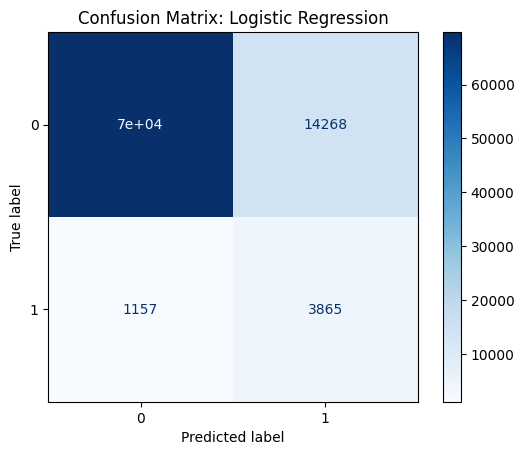

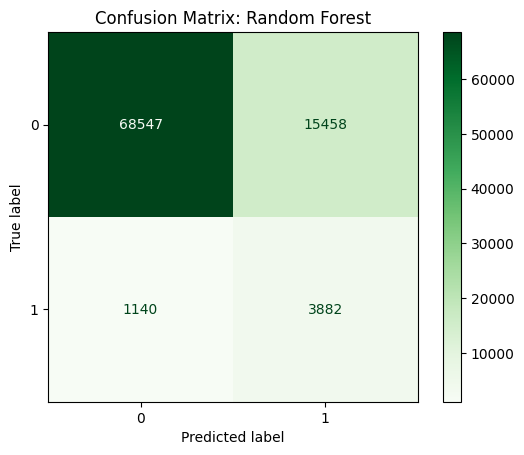

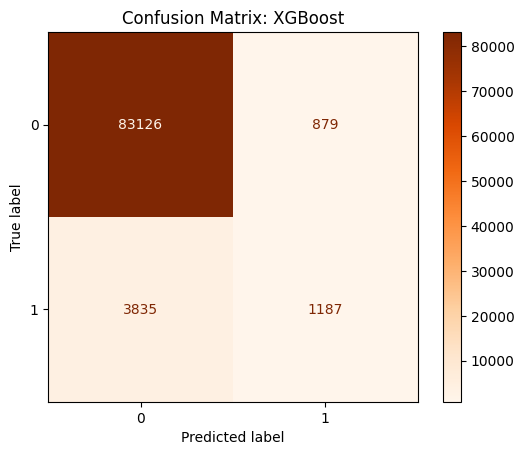

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix for Logistic Regression
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
disp_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_logreg, display_labels=grid_logreg.classes_)
disp_logreg.plot(cmap='Blues')
plt.title("Confusion Matrix: Logistic Regression")
plt.show()

# Confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=random_rf.best_estimator_.classes_)
disp_rf.plot(cmap='Greens')
plt.title("Confusion Matrix: Random Forest")
plt.show()

# Confusion matrix for XGBoost
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=grid_xgb.classes_)
disp_xgb.plot(cmap='Oranges')
plt.title("Confusion Matrix: XGBoost")
plt.show()

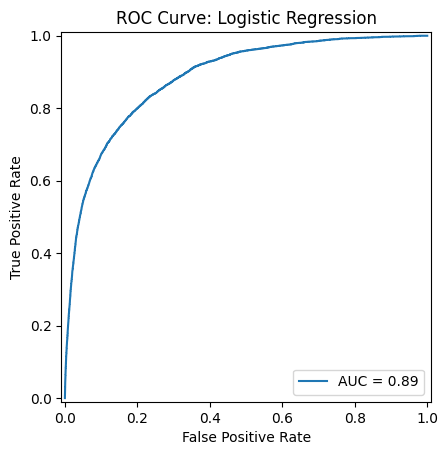

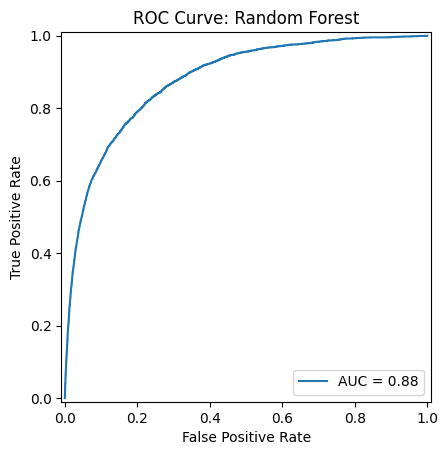

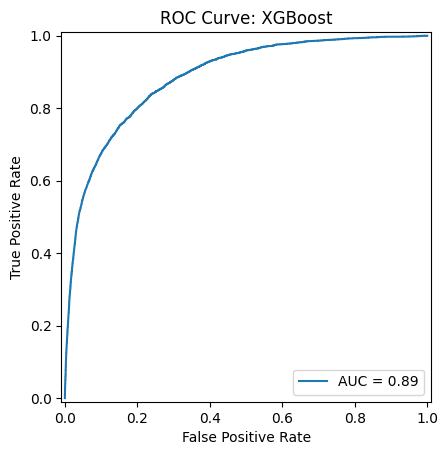

In [ ]:
from sklearn.metrics import roc_curve, RocCurveDisplay

# Logistic Regression ROC Curve
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, grid_logreg.best_estimator_.predict_proba(X_test)[:, 1])
RocCurveDisplay(fpr=fpr_logreg, tpr=tpr_logreg, roc_auc=roc_auc_score(y_test, grid_logreg.best_estimator_.predict_proba(X_test)[:, 1])).plot()
plt.title("ROC Curve: Logistic Regression")
plt.show()

# Random Forest ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, random_rf.best_estimator_.predict_proba(X_test)[:, 1])
RocCurveDisplay(fpr=fpr_rf, tpr=tpr_rf, roc_auc=roc_auc_score(y_test, random_rf.best_estimator_.predict_proba(X_test)[:, 1])).plot()
plt.title("ROC Curve: Random Forest")
plt.show()

# XGBoost ROC Curve
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, grid_xgb.best_estimator_.predict_proba(X_test)[:, 1])
RocCurveDisplay(fpr=fpr_xgb, tpr=tpr_xgb, roc_auc=roc_auc_score(y_test, grid_xgb.best_estimator_.predict_proba(X_test)[:, 1])).plot()
plt.title("ROC Curve: XGBoost")
plt.show()

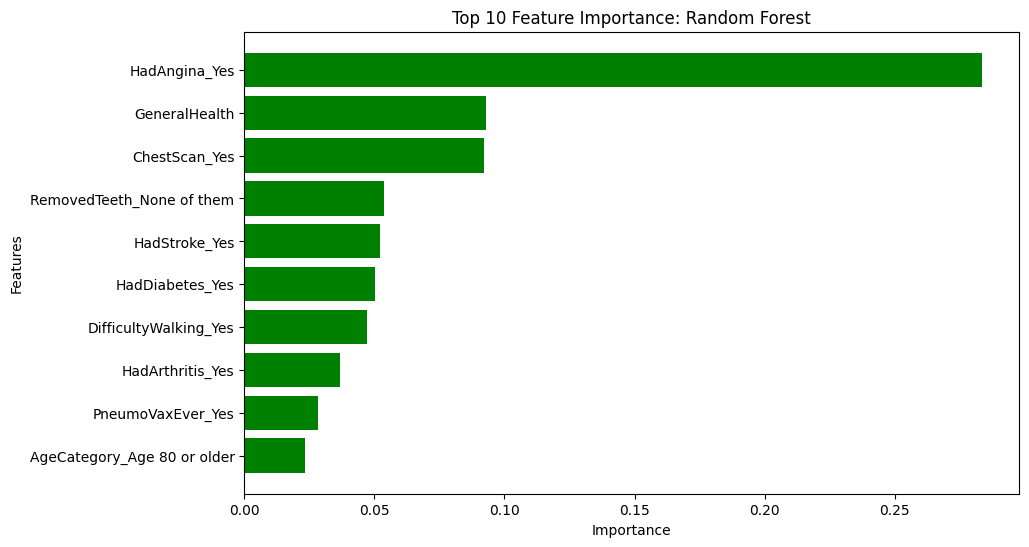

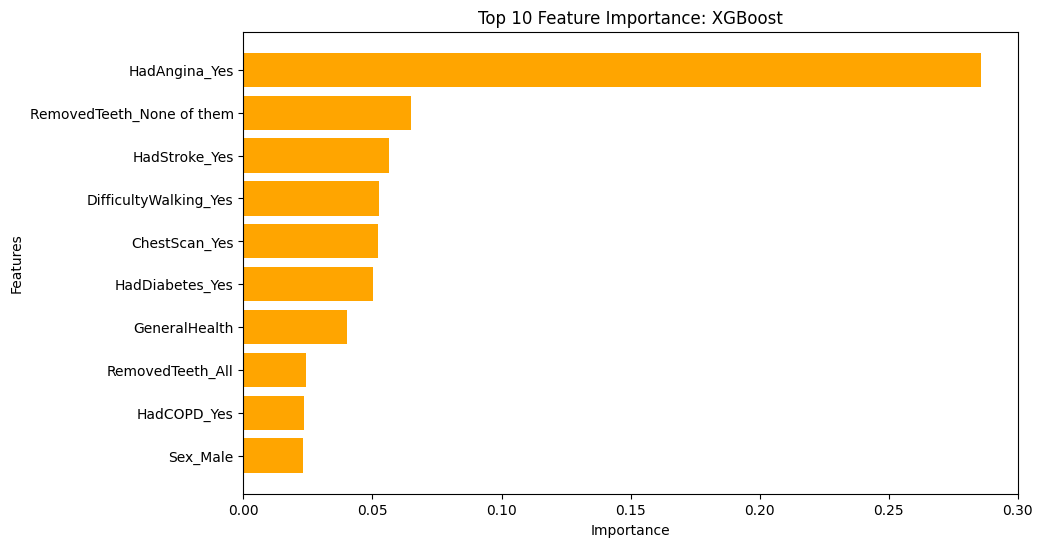

In [ ]:
# Number of top features to display
N = 10

# Get feature importance and sort by descending order
importances_rf = random_rf.best_estimator_.feature_importances_
features = X_train.columns
sorted_indices_rf = importances_rf.argsort()[::-1]

# Select top N features
top_indices_rf = sorted_indices_rf[:N]
top_features_rf = features[top_indices_rf]
top_importances_rf = importances_rf[top_indices_rf]

# Plot the top N features
plt.figure(figsize=(10, 6))
plt.barh(top_features_rf[::-1], top_importances_rf[::-1], color='green')  # Reverse for descending order
plt.title(f"Top {N} Feature Importance: Random Forest")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

# Get feature importance and sort by descending order
importances_xgb = grid_xgb.best_estimator_.feature_importances_
sorted_indices_xgb = importances_xgb.argsort()[::-1]

# Select top N features
top_indices_xgb = sorted_indices_xgb[:N]
top_features_xgb = features[top_indices_xgb]
top_importances_xgb = importances_xgb[top_indices_xgb]

# Plot the top N features
plt.figure(figsize=(10, 6))
plt.barh(top_features_xgb[::-1], top_importances_xgb[::-1], color='orange')  # Reverse for descending order
plt.title(f"Top {N} Feature Importance: XGBoost")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()